# Task 1

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def random_int_matrix(n, low=-10, high=10):
    return np.random.randint(low, high+1, size=(n, n))

In [70]:
np.random.seed(27)
k = random_int_matrix(2)
k

array([[ 9, -2],
       [ 6, -5]])

In [6]:
eigval, eigvect = np.linalg.eig(k)

In [54]:
eigvect.real[:, 1]

array([ 0.91287093, -0.36514837])

In [72]:
def task_1 (A):
    eigvals, eigvecs = np.linalg.eig(A)
    for i, lam in enumerate(eigvals):
        if lam.imag != 0:
            print(f"Eigenvalue {lam} has non-zero imaginary part")
        else:
            print(f"Eigenvalue {lam} is real")
    eigvals = eigvals.real
    eigvecs = eigvecs.real
    print("Eigenvalues:", eigvals)
    print("\nEigenvectors:", eigvecs)
    # check
    print("\nVerification A·v = λ·v:")
    for i in range(len(eigvals)):
        v = eigvecs[:, i]
        s = eigvals[i]

        left = A @ v
        right = s * v

        if np.allclose(left, right):
            print(f"✓ Eigenpair {i+1} verified.")
        else:
            print(f"✗ Eigenpair {i+1} FAILED.")
            print("A·v =", left)
            print("λ·v =", right)
    return (eigvals, eigvecs)


In [73]:
task_1(k)

Eigenvalue 8.08276253029822 is real
Eigenvalue -4.082762530298219 is real
Eigenvalues: [ 8.08276253 -4.08276253]

Eigenvectors: [[0.90896654 0.15111729]
 [0.41686908 0.98851584]]

Verification A·v = λ·v:
✓ Eigenpair 1 verified.
✓ Eigenpair 2 verified.


(array([ 8.08276253, -4.08276253]),
 array([[0.90896654, 0.15111729],
        [0.41686908, 0.98851584]]))

# Task 2

In [2]:
from matplotlib.image import imread

In [3]:
img = imread("china.jpg")
img.shape

(981, 736, 3)

In [4]:
img_sum = img.sum(axis=2)

In [5]:
img_bw = img_sum/img_sum.max()

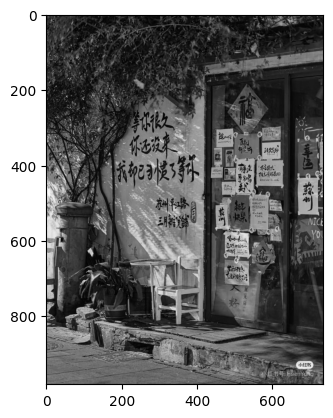

In [6]:
plt.imshow(img_bw, cmap='gray')

In [11]:
# np.allclose(eigenvectors @ eigenvectors.T, np.eye(736)) # check for identical closes

True

In [74]:
class MyData:
    def __init__(self, mean, reduced_matrix, T_matrix, num_component, cumulative_var):
        self.mean = mean
        self.reduced_matrix = reduced_matrix
        self.T_matrix = T_matrix
        self.num_component = num_component
        self.cumulative_var = cumulative_var



In [75]:
def pca(image, k = 1, n_components = None):
    mean = np.mean(image, axis=0)
    X_centered = image - mean
    cov_matrix = np.cov(X_centered, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sort_index = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sort_index]
    eigenvectors = eigenvectors[:, sort_index]

    if n_components != None:
        X_reduced = X_centered @ eigenvectors[:, :n_components]
        return MyData(mean, X_reduced, eigenvectors[:, :n_components], n_components)

    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
    cumulative_variance = np.cumsum(explained_variance_ratio)

    num_components_k = np.argmax(cumulative_variance >= k) + 1

    X_reduced = X_centered @ eigenvectors[:, :num_components_k]
    return MyData(mean, X_reduced, eigenvectors[:, :num_components_k], num_components_k, cumulative_variance)

In [76]:
img_095 = pca(img_bw, 0.95)
type(img_095)

__main__.MyData

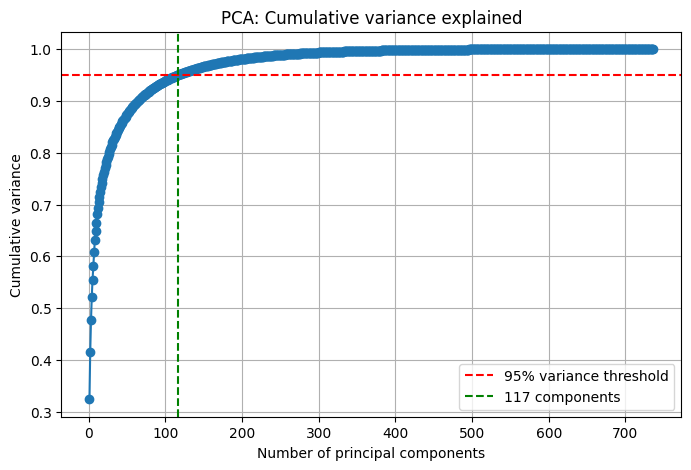

In [77]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(img_095.cumulative_var)+1), img_095.cumulative_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
plt.axvline(x=img_095.num_component +1 , color='g', linestyle='--', label=f'{img_095.num_component +1 } components')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative variance')
plt.title('PCA: Cumulative variance explained')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
def reconstraction (img_k):
    plt.imshow((img_k.reduced_matrix @ img_k.T_matrix.T) + img_k.mean, cmap='gray')
    plt.title(f"Components: {img_k.num_component}")

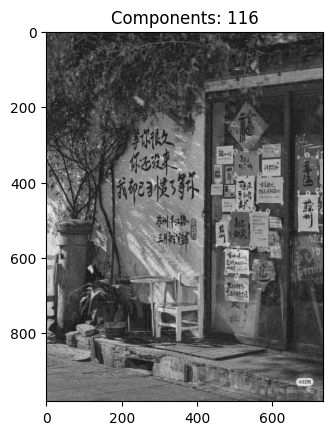

In [42]:
reconstraction(img_095)

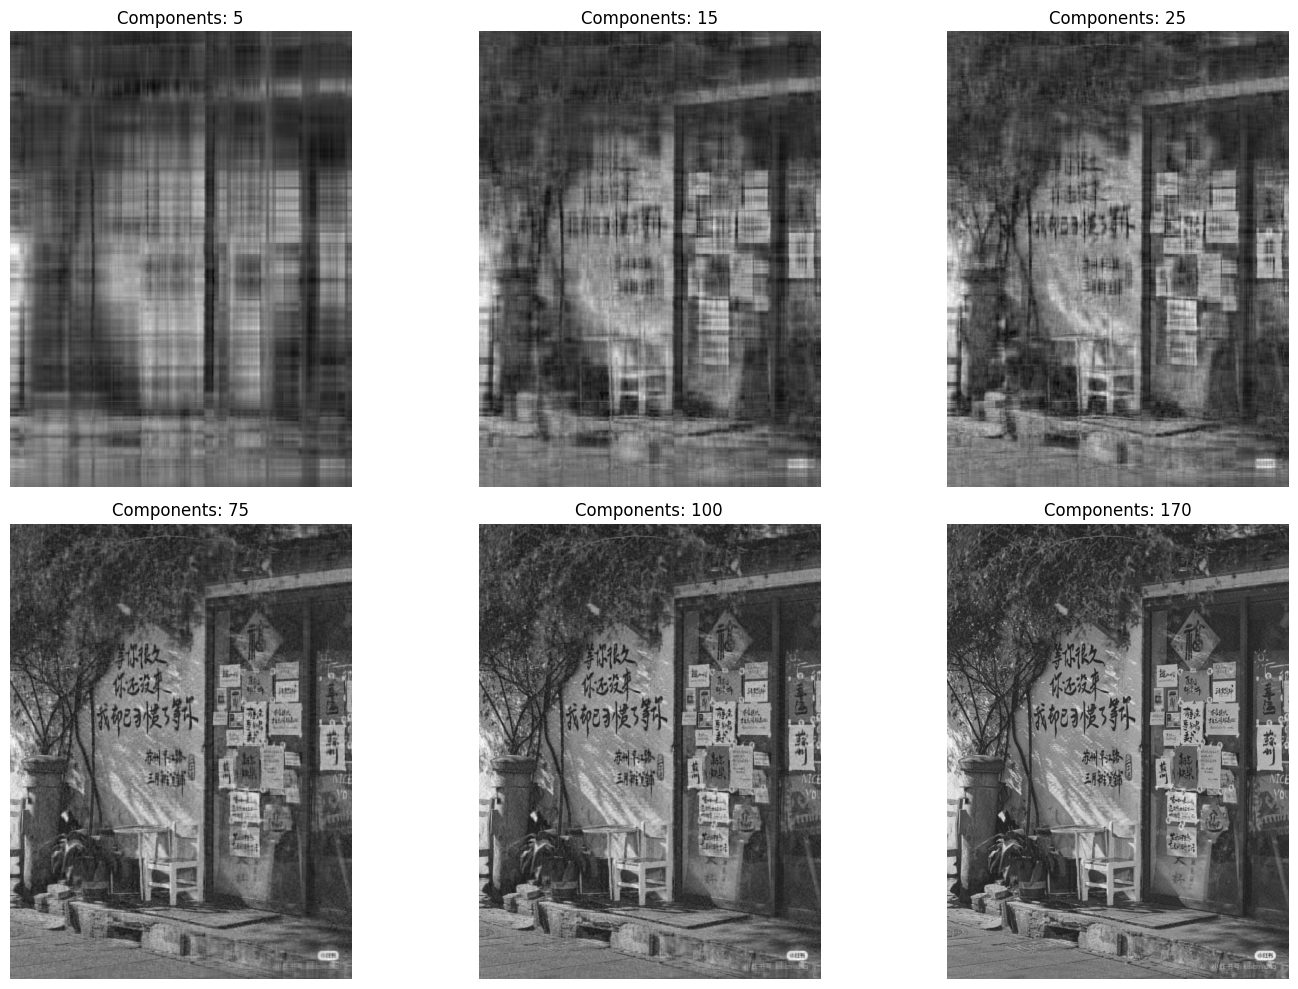

In [52]:
components_list = [5, 15, 25, 75, 100, 170]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, k in zip(axes.flatten(), components_list):
    img_k = pca(img_bw, n_components=k)

    recon = (img_k.reduced_matrix @ img_k.T_matrix.T) + img_k.mean
    recon = recon.reshape(img_bw.shape)

    ax.imshow(recon, cmap='gray')
    ax.set_title(f"Components: {k}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [54]:
def encrypt_message(message, key_matrix):
    message_vector = np.array([ord(char) for char in message])
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    diagonalized_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
    encrypted_vector = np.dot(diagonalized_key_matrix, message_vector)
    return encrypted_vector

In [55]:
message = "I have done it in one day & survived !!!!!"

In [56]:
key_matrix = np.random.randint(0, 256, (len(message), len(message)))

In [59]:
f = encrypt_message(message, key_matrix)

In [66]:
def decrypt_message (encrypted_vector, key_matrix):
    decrypted_vector = np.linalg.inv(key_matrix) @ encrypted_vector
    return "".join([chr(int(round(i.real))) for i in decrypted_vector])

In [67]:
decrypt_message(f, key_matrix)

'I have done it in one day & survived !!!!!'